In [2]:
import sys
sys.path.append('..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
from math import sin, cos, sinh, cosh, sqrt

def eta(Z, count):
    eta = []
    
    if abs(Z) < 0.5:
        eta9 = [1.527349308567059e-009, 0.36365459727787e-10, 0.00395276736172e-10,
                0.00002635178241e-10, 0.00000012199899e-10, 0.00000000042069e-10,
                0.00000000000113e-10, 0]
        eta8 = [2.901963686277412e-008, 0.76367465428353e-9, 0.00909136493195e-9,
                0.00006587945603e-9, 0.00000032939728e-9, 0.00000000121999e-9,
                0.00000000000351e-9, 0.00000000000001e-9]

        e9 = 0
        e8 = 0
        z = 1
        for i in range(8):
            e9 += z * eta9[i]
            e8 += z * eta8[i]
            z *= Z

        eta = [0, 0, 0, 0, 0, 0, 0, 0, 0, e8, e9]
        for i in range(8, -1, -1):
            eta[i] = Z * eta[i + 2] + (2 * i + 1) * eta[i + 1];
        assert count <= len(eta)
        eta = eta[:count]
    else:
        eta = [0] * count;
        

        if Z > 0:
            assert Z <= 500, "Z > 500 is not supported"
            sZ = sqrt(Z)
            eta[0] = cosh(sZ)
            if count > 1:
                eta[1] = sinh(sZ) / sZ
        else:
            sZ = sqrt(-Z)
            eta[0] = cos(sZ)
            if count > 1:
                eta[1] = sin(sZ) / sZ

        for i in range(2, count):
            eta[i] = (eta[i - 2] - (2 * i - 3) * eta[i - 1]) / Z

    return tuple(eta)

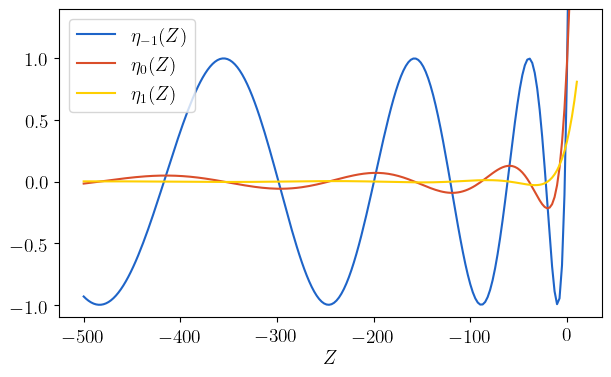

In [33]:
import numpy as np

xs = np.linspace(-500, 10, 200)

count = 3

fig, ax = plt.subplots(1,1, figsize=(7, 4))
etas = np.array([eta(x, count) for x in xs])
for c, i in zip(ugent.palet, range(count)):
    ax.plot(xs, etas[:, i], color=c, label=f"$\\eta_{{{i-1}}}(Z)$")
ax.set_ylim(-1.1, 1.4)
ax.set_xlabel("$Z$")
ax.legend(loc="upper left")

plt.savefig("eta_functions.pdf", bbox_inches="tight")
plt.show()

In [14]:
etas[:, 0]

array([-0.61727288, -0.60837125, -0.59934653, -0.59019799, -0.5809249 ,
       -0.5715265 , -0.56200207, -0.55235085, -0.5425721 , -0.53266508,
       -0.52262902, -0.51246317, -0.50216677, -0.49173906, -0.48117928,
       -0.47048665, -0.45966042, -0.44869979, -0.437604  , -0.42637227,
       -0.41500382, -0.40349785, -0.39185358, -0.38007022, -0.36814697,
       -0.35608303, -0.34387762, -0.33152991, -0.3190391 , -0.30640439,
       -0.29362495, -0.28069998, -0.26762866, -0.25441015, -0.24104364,
       -0.2275283 , -0.21386329, -0.20004778, -0.18608093, -0.1719619 ,
       -0.15768984, -0.14326392, -0.12868326, -0.11394703, -0.09905436,
       -0.08400439, -0.06879627, -0.05342911, -0.03790205, -0.02221423,
       -0.00636475,  0.00964726,  0.02582269,  0.04216241,  0.05866733,
        0.07533834,  0.09217632,  0.10918219,  0.12635685,  0.1437012 ,
        0.16121615,  0.17890262,  0.19676153,  0.21479379,  0.23300033,
        0.25138208,  0.26993997,  0.28867493,  0.3075879 ,  0.32